#  5102. [파이썬 S/W 문제해결 기본] 6일차 - 노드의 거리

V개의 노드 개수와 방향성이 없는 E개의 간선 정보가 주어진다.

주어진 출발 노드에서 최소 몇 개의 간선을 지나면 도착 노드에 갈 수 있는지 알아내는 프로그램을 만드시오.

예를 들어 다음과 같은 그래프에서 1에서 6으로 가는 경우, 두 개의 간선을 지나면 되므로 2를 출력한다.


노드 번호는 1번부터 존재하며, 노드 중에는 간선으로 연결되지 않은 경우도 있을 수 있다.

## [입력]

첫 줄에 테스트 케이스 개수 T가 주어진다.  1<=T<=50

다음 줄부터 테스트 케이스의 첫 줄에 V와 E가 주어진다. 5<=V=50, 4<=E<=1000

테스트케이스의 둘째 줄부터 E개의 줄에 걸쳐, 간선의 양쪽 노드 번호가 주어진다.

E개의 줄 이후에는 출발 노드 S와 도착 노드 G가 주어진다.

## [출력]

각 줄마다 "#T" (T는 테스트 케이스 번호)를 출력한 뒤, 답을 출력한다.

두 노드 S와 G가 서로 연결되어 있지 않다면, 0을 출력한다.

---

## Memo


- 최단거리를 구해야 함. 총 이동 횟수를 구했음..

- `v[n] = 1` 방문처리

- `V[n] = V[c] + 1` 지나간 거리 대입
    - 칸수 vs 이동 간선 



---

In [4]:
from collections import deque

# 시작, 끝
def bfs(s,e):
    
    q = deque()
    
    q.append(s) 
    v[s] = 1   
        
    # 조건에 맞으면, q에 삽입, 조건(미방문시)    
    while q: 
        c = q.popleft()
        print(c)
        
        if c == e:
            return v[e] - 1
        
        for n in adj[c]: 
            if v[n] == 0:
                q.append(n)
                v[n] = v[c] + 1
                
    # q를 다 돌아도, 목적지를 방문하지 못한 경우
    return 0 
            

- adj 인접 리스트 생성시, 개수 + 노드 번호 고려해야 함.

- 0 을 추가로 생성 고려

- 여기서는 개수만 고려

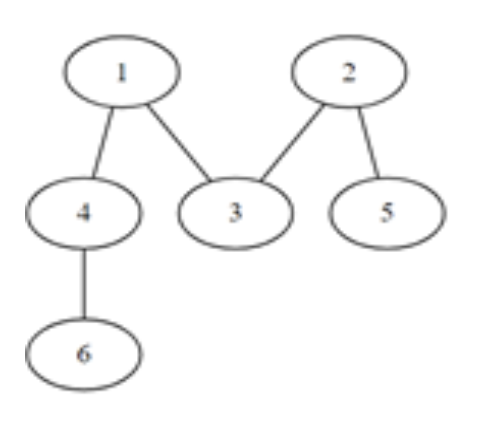

In [5]:
T = int(input())

# 노드의 개수 6개, 간선의 개수 5개
for t in range(1,T+1):
    
    # 노드의 개수, 간선의 개수 
    V,E = map(int,input().split())

    # 노드의 개수를 고려하여, 인접 리스트 생성, 0 은 추가로 생성    
    adj = [ [] for _ in range(V+1)] 

    # 양 방향 그래프, 
    for _ in range(E):
        s,e = map(int,input().split())

        adj[s].append(e)
        adj[e].append(s)

        
    # 출발 노드 S와 도착 노드 G
    S,G = map(int,input().split())
    
    v = [0] * (V+1)
    
    cnt = bfs(S,G)
    
    print('#{0} {1}'.format(t,cnt))

1
6 5
1 4
1 3
2 3
2 5
4 6
1 6
1
4
3
6
#1 2


---

In [6]:
adj

[[], [4, 3], [3, 5], [1, 2], [1, 6], [2], [4]]

In [10]:
v

[0, 1, 3, 2, 2, 0, 3]

## 방문 표시 리스트 분석


- 방문 표시 리스트 확인을 위해, main.py 에 선언



- 첫번째 레벨 1 (시작노드)


- 시작노드와 연결된 레벨 4,3


- 4,3 노드와 연결된 다음 레벨 6,2 인데 6에서 바로 끝

---

## 인접 리스트 내 안쪽 리스트 오름차순 으로 변경

- 노드 1과 연결된 3,4 중 4를 먼저 대입했으므로, adj [4,3] 으로 들어가있으므로, 4우선 출력

- 만약 3부터 나오게 하고 싶으면 인접 리스트 내 오름차순 설정

In [7]:
# 인접 리스트 내 안쪽 리스트 오름차순 으로 변경
for lst in adj:
    lst.sort()

In [8]:
adj

[[], [3, 4], [3, 5], [1, 2], [1, 6], [2], [4]]

---

## result

- bfs 는 FIFO, 들어간 순서대로 방문,(append 순) == 나온 순서대로 방문(popleft 순)

- 방문 표시 리스트를 이용한 거리 표시, 이건 총 몇개를 방문 했냐, 모든 노드 중 방문 순서가 아니라,

- 시작 노드와 도착 노드 사이의 레벨 거리 == 즉, 최단 거리임.